In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re
from src import user_item_split
from scipy import stats

/Users/polinab/.virtualenvs/base/lib/python3.8/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
data = pd.read_csv('./data/Consumidor_Venta_Producto_UPC_Recom_2018_2020.csv')
english_cols = {'FACTURA_ID': 'INVOICE_ID', 'FACTURA_POSICION_ID': 'INVOICE_POSITION_ID', 'CUSTOMER_ID': 'CUSTOMER_ID',
                'FACTURA_CLASE_DOCUMENTO_ID': 'INVOICE_DOCUMENT_CLASS_ID', 'ANO_MES_FACTURA': 'INVOICE_MONTH_YEAR',
                'ANO_FACTURA': 'ORDER_YEAR', 'MES_FACTURA': 'ORDER_MONTH', 'FECHA_FACTURA': 'INVOICE_DATE',
                'IMP_VENTA_NETO_EUR': 'NET_SALES_EUR', 'CANAL_VENTA_ID': 'SALES_CHANNEL_ID',
                'CANAL_VENTA_DESC': 'SALES_CHANNEL_DESC', 'TEMPORADA_COMERCIAL_ID': 'SEASON_ID',
                'TEMPORADA_COMERCIAL_DESC': 'SEASON_DESC', 'PRODUCTO_ID': 'PRODUCT_ID', 'TALLA': 'SIZE',
                'MATERIAL_ID': 'MATERIAL_ID', 'NUMERO_DEUDOR_PAIS_ID': 'SALE_COUNTRY_ID',
                'NUMERO_DEUDOR_PAIS_DESC': 'SALE_COUNTRY_DESC', 'VENTA_DEVOLUCION': 'SALES_FILTER',
                'JERARQUIA_PROD_ID': 'PRODUCT_HIERARCHY_ID', 'GRUPO_ARTICULO_PRODUCTO_ID': 'PRODUCT_GROUP_ID',
                'GRUPO_ARTICULO': 'PRODUCT_GROUP', 'CONCEPTO': 'CONCEPT', 'LINEA': 'LINE',
                'GENERO_PRODUCTO': 'PRODUCT_GENDER', 'CATEGORIA': 'PRODUCT_CATEGORY', 'TIPOLOGIA': 'PRODUCT_TYPE',
                'COLOR': 'COLOR_INTERN', 'CONSUMER_COLOR': 'COLOR_EXTERN', 'CREMALLERA': 'ZIPPER', 'CORDONES': 'LACES',
                'OUTSOLE_SUELA_TIPO': 'SOLE_TYPE', 'OUTSOLE_SUELA_SUBTIPO': 'SOLE_SUBTYPE',
                'PLANTILLA_EXTRAIBLE': 'REMOVABLE_SOLE', 'CONTACTO_SN': 'PHYSICAL_CONTACT', 'EDAD_SN': 'AGE_AVAILABLE',
                'GENERO_CONTACTO': 'GENDER_AVAILABLE', 'EDAD_COMPRA': 'AGE_AT_PURCHASE',
                'EDAD_RANGO_COMPRA': 'AGE_RANGE',
                'PAIS_CONTACTO': 'COUNTRY_CONTACT_ID', 'PAIS_CONTACTO_DESC': 'COUNTRY_CONTACT_DESC',
                'CIUDAD_CONTACTO': 'CITY_CONTACT', 'IDIOMA_CONTACTO': 'LANGUAGE_CONTACT'}


In [3]:
data = data.rename(columns=english_cols)

In [4]:
customer_frequency = data.value_counts('CUSTOMER_ID')
log_cf = np.log10(customer_frequency)

/Users/polinab/.virtualenvs/base/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

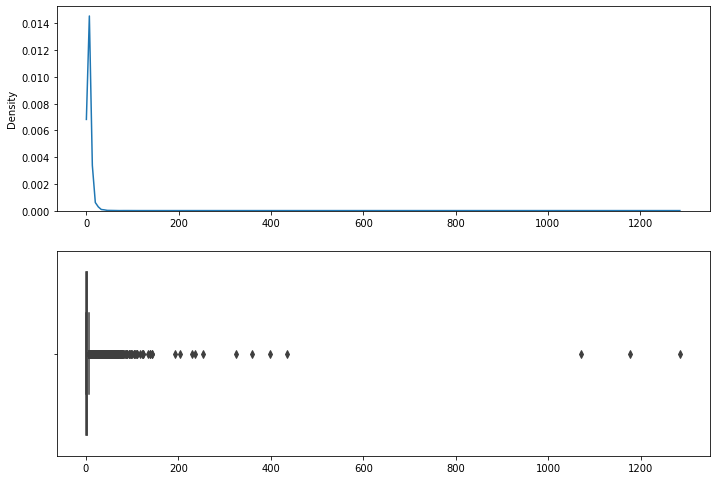

In [5]:
fig, ax =plt.subplots(2,1, figsize=(11.7, 8.27))

sns.kdeplot(customer_frequency,ax=ax[0])
sns.boxplot(customer_frequency,ax=ax[1])

Above you can see the density distribution of frequency of buys of customers. The majority of customers only buy once, but there is a long tail of a sparse amount of high-repeat purchasers. We want to segment the customers into buyer frequency.

In [6]:
customer_freq_no_out = customer_frequency[customer_frequency.between(customer_frequency.quantile(.00), customer_frequency.quantile(.97))]
customer_freq_no_out

CUSTOMER_ID
qul5cdPSrxZBFkFOfltEM4iRxEL4DdY5cEHDoIzksIM=    9
Yr0fkEsGYXjzQTMZbdq1dYwmnz+OQ0ESCRd9ngG2b7c=    9
ehIdp3B39wVhGWQkEveF9AdMpscopsfpDodFxs/7iXs=    9
dd3jstxAL+mERasnT0JLYz6VQzyMR3fUDqSYK3WGcSE=    9
b52kSnuZ84xak4qSW3M4juiJWRP1boozKsDMIi+0ltY=    9
                                               ..
LgmnbBTPqoBdHnLRxIYrf1UZaWUwWkaAphkvt8X61V8=    1
ipkdHX5TfMZJWmqR05mr3XIjpFMt+cnZ2bd7EQz4M0I=    1
LgkvbK3r/Gj7XxDHcv/yYGgR0rM/bY3F/4j2uwbZ4Y0=    1
LgjQsiBy2F3l0nlFdVMwQyQ8S7QRqbPvoHgmA36pIOk=    1
TveVbD07NvdtPX23KFBjsqxm5N8tgJAlPZL4VHFdo/E=    1
Length: 501459, dtype: int64

In [7]:
customer_frequency.size - customer_freq_no_out.size

15460

/Users/polinab/.virtualenvs/base/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

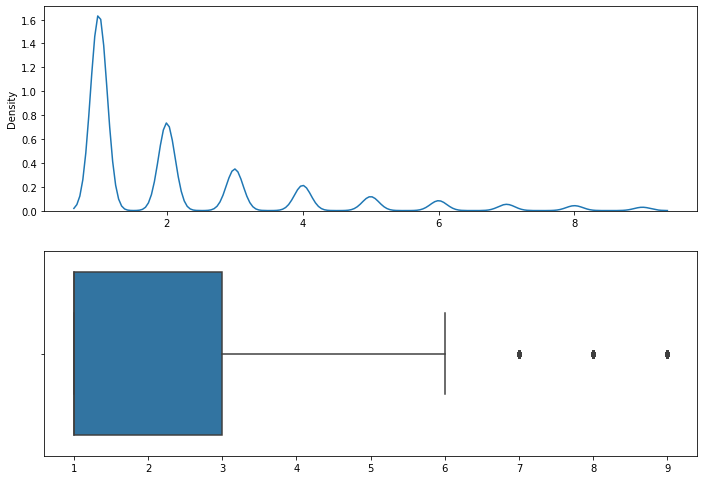

In [8]:
fig, ax =plt.subplots(2,1, figsize=(11.7, 8.27))
sns.kdeplot(customer_freq_no_out,ax=ax[0])
sns.boxplot(customer_freq_no_out,ax=ax[1])

Something is wrong with the KDE plot above, but already we can better see the distribution of the majority of customer frequencies.

In [9]:

customer_frequency = customer_frequency.to_frame().rename(columns={0: 'buyer_frequency'})
customer_frequency

,buyer_frequency
CUSTOMER_ID,
U83Hms6U4ueMr4nz7C1/oNURckPvj2qS/JyOJBQdNWU=,1285
2eS7vLUbTbjbJf9ip+zUnQaEGX6iFrPOYA2VHssf6hM=,1178
h3xU3lnX/PvZErsbJnWFtQCBDdHuhavYS0Aj69QnZOo=,1070
J3+bSWrbjJBK0w93XbcIDN5EENotCX6Pf1BJoiTWd8E=,435
lxZaVWzsespHCsJeG/RylO1oXqLvaEW+SCjOUJhJnNY=,398
...,...
LgmnbBTPqoBdHnLRxIYrf1UZaWUwWkaAphkvt8X61V8=,1
ipkdHX5TfMZJWmqR05mr3XIjpFMt+cnZ2bd7EQz4M0I=,1
LgkvbK3r/Gj7XxDHcv/yYGgR0rM/bY3F/4j2uwbZ4Y0=,1


In [10]:
data = data.merge(customer_frequency, left_on='CUSTOMER_ID', right_on='CUSTOMER_ID')
data

,INVOICE_ID,INVOICE_POSITION_ID,CUSTOMER_ID,INVOICE_DOCUMENT_CLASS_ID,INVOICE_MONTH_YEAR,ORDER_YEAR,ORDER_MONTH,INVOICE_DATE,NET_SALES_EUR,SALES_CHANNEL_ID,...,PHYSICAL_CONTACT,AGE_AVAILABLE,GENDER_AVAILABLE,AGE_AT_PURCHASE,AGE_RANGE,COUNTRY_CONTACT_ID,COUNTRY_CONTACT_DESC,CITY_CONTACT,LANGUAGE_CONTACT,buyer_frequency
0,2945652414,1,rFT69H3UGh2ARZpBvvotibgvZ6EXIucsbnz1Zxedtwg=,ZTON,201911,2019,11,2019-11-29,142.86,20,...,S,N,WOMAN,0,NS,DE,GERMANY,Berlin,DE,4
1,2945652414,2,rFT69H3UGh2ARZpBvvotibgvZ6EXIucsbnz1Zxedtwg=,ZTON,201911,2019,11,2019-11-29,107.14,20,...,S,N,WOMAN,0,NS,DE,GERMANY,Berlin,DE,4
2,2945725927,1,rFT69H3UGh2ARZpBvvotibgvZ6EXIucsbnz1Zxedtwg=,ZDVN,201912,2019,12,2019-12-09,-142.86,20,...,S,N,WOMAN,0,NS,DE,GERMANY,Berlin,DE,4
3,2945725927,2,rFT69H3UGh2ARZpBvvotibgvZ6EXIucsbnz1Zxedtwg=,ZDVN,201912,2019,12,2019-12-09,-107.14,20,...,S,N,WOMAN,0,NS,DE,GERMANY,Berlin,DE,4
4,2911680032,2,DZybTgMUb57l6e9/6VwWNFBT6FCX7iup9nv9FzNmwmg=,ZTON,201911,2019,11,2019-11-29,85.74,20,...,S,N,NV,0,NS,RO,RUMANÍA,Buzau,EN,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1325439,2044647554,1,IreBvQGKxHMCT+tUQg6q120EW/FZjBJGAG/Hky7cBYc=,ZTON,202012,2020,12,2020-12-31,115.30,20,...,S,N,NV,0,NS,US,UNITED STATES,Brandon,EN,1
1325440,2043647295,1,3ZlIuJv1dt4i9QtfNCjf50E1NV9+eamx4SwuTf/gzYM=,ZTON,202012,2020,12,2020-12-31,83.57,20,...,S,S,NV,53,50-59,GB,UNITED KINGDOM OF GREAT BRITAIN AND NORTHERN I...,London,EN,1
1325441,2056631051,1,NWPMoTr8dD6kRGbgbb+kwFs+FP1nt9kE1gi5qa6KdfE=,ZTON,202012,2020,12,2020-12-31,130.10,20,...,S,S,NV,40,40-49,TR,TURKEY,Beylikdüzü,TR,1
1325442,2011713231,1,hsty7eF4gRLqs+fhWSpxQtraXj3pSdEm8nIbt3Zb8CQ=,ZTON,202012,2020,12,2020-12-31,103.30,20,...,S,S,NV,32,30-39,ES,SPAIN,TORRES DE COTILLAS,ES,1


In [21]:
multiple_orders = data.loc[data.buyer_frequency > 1].copy()
single_orders = data.loc[data.buyer_frequency == 1].copy()
multiple_orders['buy_freq_group'] = pd.qcut(multiple_orders["buyer_frequency"],4, precision=0,labels=[2,3,4,5])
single_orders['buy_freq_group'] = 1

In [25]:
data = pd.concat([multiple_orders,single_orders])

In [30]:
print("group sizes: ")
for i in range(5):
    print(f'group {i+1} :',data[data.buy_freq_group == i+1].size)

group sizes: 
group 1 : 11377575
group 2 : 17412570
group 3 : 9900180
group 4 : 10010250
group 5 : 10944405
